In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


In [ ]:
#test
#evidence_k, max_resurces, with_rcs, with_agent, precision,accuracy
#30, 15,Yes,Yes,0.7954545454545454，0.7142857142857143
#30,5,Yes, Yes, 0.6739130434782609， 0.6326530612244898,
#1,15,Yes, Yes,0.5806451612903226,0.3673469387755102
#5,15,Yes,Yes,0.75,0.6122448979591837
#10,15,Yes,Yes,0.7027027027027027,0.5306122448979592

#30,15,No,Yes,0.6764705882352942,0.46938775510204084
#30,15,Yes,No,0.7837837837837838，0.5918367346938775


#gpt-4o-mini
#precision,accuracy
#0.205,0.184


########
#train
#evidence_k, max_resurces, with_rcs, with_agent, precision,accuracy
#30, 15,Yes,Yes,0.8260869565217391,0.6683417085427136
#30,5,Yes, Yes, 0.7964071856287425，0.6683417085427136
#1,15,Yes, Yes,0.7567567567567568,0.4221105527638191


In [15]:
# Create DataFrame from your data
data = pd.DataFrame([
    {"model": "Cutoff @ 15", "precision": 0.7954, "accuracy": 0.7143},
    {"model": "Cutoff @ 5", "precision": 0.6739, "accuracy": 0.6327},
    {"model": "Top K @ 1", "precision": 0.5806, "accuracy": 0.3673},
    {"model": "Top K @ 5", "precision": 0.7500, "accuracy": 0.6122},
    {"model": "Top K @ 10", "precision": 0.7027, "accuracy": 0.5306},
    {"model": "No RCS", "precision": 0.6765, "accuracy": 0.4694},
    {"model": "No Agent", "precision": 0.7838, "accuracy": 0.5918},
    {"model": "GPT-4o-mini", "precision": 0.2050, "accuracy": 0.1840},
    # Add human performance if available
    {"model": "Human", "precision": 0.7380, "accuracy": 0.6770}  # Example values from your chart
])

# Sort by precision (descending)
# data = data.sort_values('precision', ascending=False)

/var/folders/wg/h6z2ybxs0bnfsz9zc363lx_w0000gn/T/ipykernel_1552/3168909171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='precision', data=data, ax=ax1, palette='RdYlBu_r')
/var/folders/wg/h6z2ybxs0bnfsz9zc363lx_w0000gn/T/ipykernel_1552/3168909171.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
/var/folders/wg/h6z2ybxs0bnfsz9zc363lx_w0000gn/T/ipykernel_1552/3168909171.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='accuracy', data=data, ax=ax2, palette='RdYlBu_r')
/var/folders/wg/h6z2ybxs0bnfsz9zc36

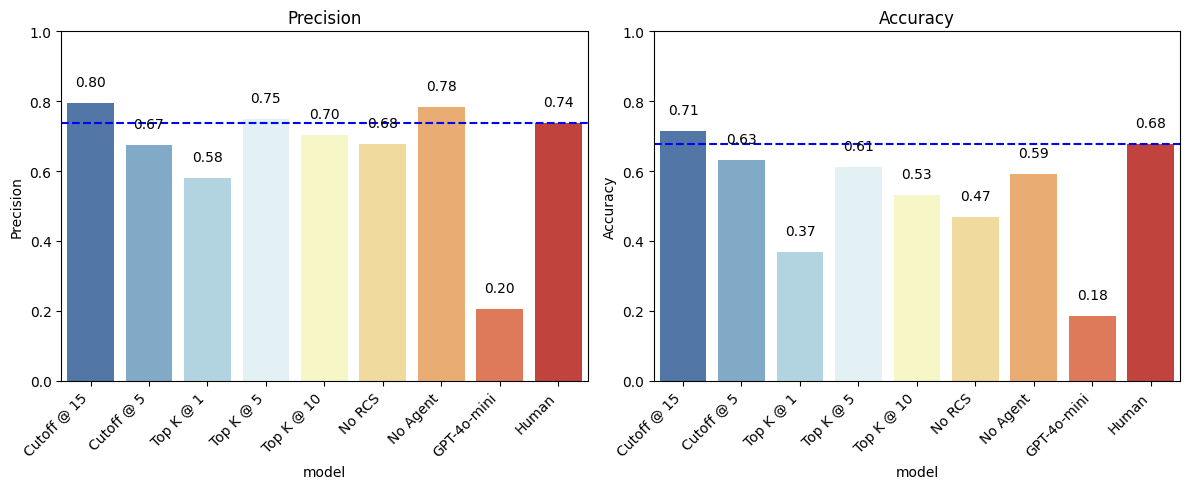

In [19]:
# Create a figure with two subplots (precision and accuracy)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot precision
sns.barplot(x='model', y='precision', data=data, ax=ax1, palette='RdYlBu_r')
ax1.set_ylabel('Precision')
ax1.set_title('Precision')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.axhline(y=data[data['model'] == 'Human']['precision'].values[0], 
           color='blue', linestyle='--', label=f"Human = {data[data['model'] == 'Human']['precision'].values[0]}")
ax1.set_ylim(0, 1)

# Plot accuracy
sns.barplot(x='model', y='accuracy', data=data, ax=ax2, palette='RdYlBu_r')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.axhline(y=data[data['model'] == 'Human']['accuracy'].values[0], 
           color='blue', linestyle='--', label=f"Human = {data[data['model'] == 'Human']['accuracy'].values[0]}")
ax2.set_ylim(0, 1)
#add annotations
for i, row in data.iterrows():
    ax1.text(i, row['precision'] + 0.04, f"{row['precision']:.2f}", ha='center', va='bottom')
    ax2.text(i, row['accuracy'] + 0.04, f"{row['accuracy']:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.savefig('paperqa2_performance.png', dpi=300)
plt.show()